In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [54]:
amex = pd.read_csv("AMEX_daytoday.csv")

In [55]:
amex.drop("Unnamed: 0", axis =1, inplace=True)

In [56]:
metrics = pd.read_csv("amex_metrics.csv")

In [57]:
metrics.drop("Unnamed: 0", axis =1, inplace=True)

In [58]:
new_df = metrics.merge(amex, how='inner')

In [59]:
xxii = metrics[(metrics["Ticker"] == "ACU")]

In [60]:
metrics.dropna(inplace=True)
metrics

,Market Cap,PE Ratio,Ticker,Year To Date Change
8,82016675,17.36,ACU,0.054395
11,22029669,10.51,ACY,-0.008843
25,198808495,63.76,AINC,0.001687
29,79604411,37.75,ASM,0.048276
37,143023091,16.17,BGSF,0.011187
38,15836610,-0.22,BPMX,0.071429
48,223197815,14.87,BRG,-0.076389
49,78865884,-13.33,BVX,-0.054264
56,26808821,-3.50,CVM,0.155914
61,6543208000,353.00,CQH,-0.006704


In [61]:
X = metrics[["PE Ratio", "Market Cap"]]
y = metrics["Year To Date Change"].values.reshape(-1,1)
print(X.shape, y.shape)

(78, 2) (78, 1)


In [62]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

### END SOLUTION

In [63]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [64]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
try:
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    print(model.coef_)
except:
    pass
### END SOLUTION 
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


[[ -4.02983721e-19  -3.46926826e-12]]
Training Score: 0.008160311738498072
Testing Score: 0.02815421693643727


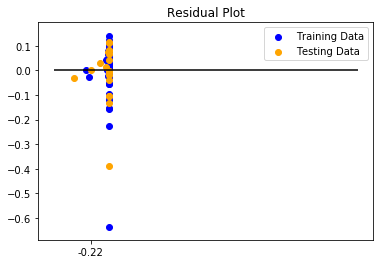

In [66]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION
plt.show()

In [ ]:
#sklearn linear model (regression)
from sklearn.linear_model import LinearRegression

In [ ]:
# MODEL
# specify model
model = LinearRegression()
model

In [ ]:
# FIT
#fit data to our model
model.fit(X, y)
model

In [ ]:
print("m: ", model.coef_)
print("b: ", model.intercept_)

In [ ]:
x_min = X.min()
x_max = X.max()

y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [ ]:
plt.plot(X, y)
plt.plot([x_min, x_max], [y_min[0], y_max[0]])
plt.gca().invert_xaxis()
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
model.score(X, y)

In [ ]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Fit the model to the training data. 

# YOUR CODE HERE
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# YOUR CODE HERE
# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")